In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [[0,0],[1,0],[0,1],[1,1]]
X = np.array(X)
Y = [0,1,1,0]

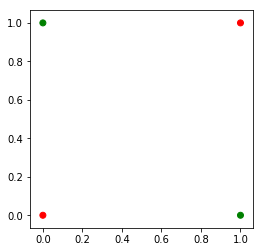

In [3]:
colors = ['r' if l == 0 else 'g' for l in Y[:]]
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1],c = colors)
plt.show()

In [4]:
x = tf.placeholder(dtype=tf.float32,shape=[None,2],name = "input")
y = tf.placeholder(dtype=tf.float32,shape=[None,1],name = "label")

In [5]:
weight = {
    "W1" : tf.Variable(initial_value=tf.random_normal(shape=[2,2],stddev=0.1),name="W1"),
    "W2" : tf.Variable(initial_value=tf.random_normal(shape=[2,1],stddev=0.1),name="W2")
}
bias = {
    "B1" : tf.Variable(initial_value=tf.zeros([2]),name="B1"),
    "B2" : tf.Variable(initial_value=tf.zeros([1]),name="B2")
}

In [10]:
lay_1 = tf.matmul(x,weight["W1"])+bias["B1"]
lay_1_sigmoid = tf.nn.sigmoid(lay_1)
lay_2 = tf.matmul(lay_1_sigmoid,weight["W2"])+bias["B2"]
pred = tf.nn.tanh(lay_2)
cost = tf.reduce_mean(tf.square(y - pred))
opti = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [11]:
init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=2)
epochs = 3000
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for inter in range(4):
            _,loss = sess.run([opti,cost],feed_dict = {x:np.reshape(X[inter],[1,2]),y:np.reshape(Y[inter],[1,1])})
        if epoch % 100 == 0:
            print("epoch:{0},loss:{1}".format(epoch,loss))
            saver.save(sess,"XORsave/xor.ckpt",global_step = epoch)

epoch:0,loss:0.18762356042861938
epoch:100,loss:0.35262295603752136
epoch:200,loss:0.3420768082141876
epoch:300,loss:0.33666643500328064
epoch:400,loss:0.3353128433227539
epoch:500,loss:0.3373568058013916
epoch:600,loss:0.3432142734527588
epoch:700,loss:0.3554660975933075
epoch:800,loss:0.3811458647251129
epoch:900,loss:0.4333093464374542
epoch:1000,loss:0.495918333530426
epoch:1100,loss:0.48312318325042725
epoch:1200,loss:0.42827874422073364
epoch:1300,loss:0.3473435342311859
epoch:1400,loss:0.16546611487865448
epoch:1500,loss:0.022278979420661926
epoch:1600,loss:0.0034504751674830914
epoch:1700,loss:0.001001755241304636
epoch:1800,loss:0.0004212469211779535
epoch:1900,loss:0.00021907892369199544
epoch:2000,loss:0.00013016450975555927
epoch:2100,loss:8.45975082484074e-05
epoch:2200,loss:5.863818296347745e-05
epoch:2300,loss:4.2655086872400716e-05
epoch:2400,loss:3.2205811294261366e-05
epoch:2500,loss:2.5044852009159513e-05
epoch:2600,loss:1.9958177290391177e-05
epoch:2700,loss:1.62214

In [12]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"XORsave/xor.ckpt-2900")
    result = []
    for i in range(4):
        r = sess.run(pred,feed_dict={x:np.reshape(X[i],[1,2])})
        result.append(r)
    print(result)

INFO:tensorflow:Restoring parameters from XORsave/xor.ckpt-2900
[array([[0.00152576]], dtype=float32), array([[0.96547884]], dtype=float32), array([[0.9656045]], dtype=float32), array([[0.00140595]], dtype=float32)]


In [15]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"XORsave/xor.ckpt-2900")
    result = []
    for i in range(4):
        r = sess.run(lay_1_sigmoid,feed_dict={x:np.reshape(X[i],[1,2])})
        result.append(r)
    print(result)

INFO:tensorflow:Restoring parameters from XORsave/xor.ckpt-2900
[array([[0.96116465, 0.73049325]], dtype=float32), array([[0.7361966 , 0.04576518]], dtype=float32), array([[0.7284898 , 0.03762642]], dtype=float32), array([[0.23226796, 0.00069133]], dtype=float32)]


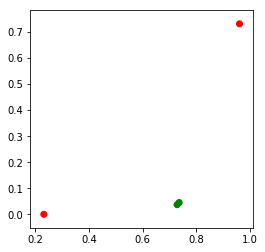

In [16]:
result = np.reshape(result,[4,2])
plt.figure(figsize=[4,4])
plt.scatter(result[:,0],result[:,1],c = colors)
plt.show()